# Predict A Doctor's Consultation Fee 

Here from the provided dataset we need to predict the doctor's fees by using various models 

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
#getting train and test dataset

train=pd.read_excel('dental_train.xlsx')
test=pd.read_excel('dental_test.xlsx')

In [3]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [4]:
test

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


Combine the Train and test dataset

In [5]:
data=train.append(test,sort=False)

In [6]:
data

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN


FEATURES:

Size of training set: 5961 records

Size of test set: 1987 records
    
Column description:    

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [7]:
#data columns

data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
#finding the null value

data.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
dtype: int64

In [9]:
#data types of columns

data.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
dtype: object

In [10]:
#data info of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       7948 non-null   object 
 1   Experience          7948 non-null   object 
 2   Rating              3556 non-null   object 
 3   Place               7917 non-null   object 
 4   Profile             7948 non-null   object 
 5   Miscellaneous_Info  4494 non-null   object 
 6   Fees                5961 non-null   float64
dtypes: float64(1), object(6)
memory usage: 496.8+ KB


# Data Analysing and Preprocessing

Spliting the data as required using split as shoen below

In [11]:
#Spliting the data as required using split as shownn below

data['Q1']=data['Qualification'].str.split(',').str[0]
data['Q2']=data['Qualification'].str.split(',').str[1]
data['Q3']=data['Qualification'].str.split(',').str[2]
data=data.drop(['Qualification'],axis=1)
data['Q1'].fillna("missing",inplace = True)
data['Q2'].fillna("missing",inplace = True)
data['Q3'].fillna("missing",inplace = True)

In [12]:
#data after spliting Qualification column

data

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Q1,Q2,Q3
0,24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,missing
1,12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,missing
2,9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,missing
3,12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,BSc - Zoology,BAMS,missing
4,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,missing,missing
...,...,...,...,...,...,...,...,...,...
1982,10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,BAMS,Doctor of Medicine,missing
1983,4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,MD - Dermatology,Venereology & Leprosy,MBBS
1984,9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,MBBS,MD / MS - Obstetrics & Gynaecology,missing
1985,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,BDS,missing,missing


In [13]:
#Spliting the data as required using split as shown below

data['Expert']=data['Experience'].str.split(' ').str[0]
data=data.drop(['Experience'],axis=1)

In [14]:
#data after spliting Experience column

data

,Rating,Place,Profile,Miscellaneous_Info,Fees,Q1,Q2,Q3,Expert
0,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,missing,24
1,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,missing,12
2,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,missing,9
3,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,BSc - Zoology,BAMS,missing,12
4,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,missing,missing,20
...,...,...,...,...,...,...,...,...,...
1982,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,BAMS,Doctor of Medicine,missing,10
1983,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,MD - Dermatology,Venereology & Leprosy,MBBS,4
1984,NaN,"Porur, Chennai",General Medicine,NaN,NaN,MBBS,MD / MS - Obstetrics & Gynaecology,missing,9
1985,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,BDS,missing,missing,12


In [15]:
#replacing nan values with 0

data['Rating'].fillna('0%',inplace = True)

In [16]:
data

,Rating,Place,Profile,Miscellaneous_Info,Fees,Q1,Q2,Q3,Expert
0,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,missing,24
1,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,missing,12
2,0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,missing,9
3,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,BSc - Zoology,BAMS,missing,12
4,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,missing,missing,20
...,...,...,...,...,...,...,...,...,...
1982,0%,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,BAMS,Doctor of Medicine,missing,10
1983,0%,"Choolai, Chennai",Dermatologists,NaN,NaN,MD - Dermatology,Venereology & Leprosy,MBBS,4
1984,0%,"Porur, Chennai",General Medicine,NaN,NaN,MBBS,MD / MS - Obstetrics & Gynaecology,missing,9
1985,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,BDS,missing,missing,12


In [17]:

#spliting the place as required

data['City'] = data['Place'].str.split(',').str[1]
data['Area'] = data['Place'].str.split(',').str[0]
data['City'].fillna("missing",inplace = True)
data['Area'].fillna("missing",inplace = True)
data=data.drop(['Place'],axis=1)

In [18]:
#data after spliting Place column

data

,Rating,Profile,Miscellaneous_Info,Fees,Q1,Q2,Q3,Expert,City,Area
0,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,BHMS,MD - Homeopathy,missing,24,Ernakulam,Kakkanad
1,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,BAMS,MD - Ayurveda Medicine,missing,12,Bangalore,Whitefield
2,0%,ENT Specialist,NaN,300.0,MBBS,MS - Otorhinolaryngology,missing,9,Bangalore,Mathikere - BEL
3,0%,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,BSc - Zoology,BAMS,missing,12,Bangalore,Bannerghatta Road
4,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,BAMS,missing,missing,20,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...,...,...
1982,0%,Ayurveda,NaN,NaN,BAMS,Doctor of Medicine,missing,10,Bangalore,Basavanagudi
1983,0%,Dermatologists,NaN,NaN,MD - Dermatology,Venereology & Leprosy,MBBS,4,Chennai,Choolai
1984,0%,General Medicine,NaN,NaN,MBBS,MD / MS - Obstetrics & Gynaecology,missing,9,Chennai,Porur
1985,98%,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,BDS,missing,missing,12,Bangalore,Arekere


In [19]:
print(data['Fees'].min())
print(data['Fees'].max())

5.0
950.0


In [20]:
#Filling the fees column with the mean of fee


data['Fees']=data['Fees'].fillna(data['Fees'].mean()).astype(int)

In [21]:
data

,Rating,Profile,Miscellaneous_Info,Fees,Q1,Q2,Q3,Expert,City,Area
0,100%,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,BHMS,MD - Homeopathy,missing,24,Ernakulam,Kakkanad
1,98%,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,BAMS,MD - Ayurveda Medicine,missing,12,Bangalore,Whitefield
2,0%,ENT Specialist,NaN,300,MBBS,MS - Otorhinolaryngology,missing,9,Bangalore,Mathikere - BEL
3,0%,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,BSc - Zoology,BAMS,missing,12,Bangalore,Bannerghatta Road
4,100%,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,BAMS,missing,missing,20,Chennai,Keelkattalai
...,...,...,...,...,...,...,...,...,...,...
1982,0%,Ayurveda,NaN,307,BAMS,Doctor of Medicine,missing,10,Bangalore,Basavanagudi
1983,0%,Dermatologists,NaN,307,MD - Dermatology,Venereology & Leprosy,MBBS,4,Chennai,Choolai
1984,0%,General Medicine,NaN,307,MBBS,MD / MS - Obstetrics & Gynaecology,missing,9,Chennai,Porur
1985,98%,Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,307,BDS,missing,missing,12,Bangalore,Arekere


In [22]:
#to find the null value in the dataset 

data.isnull().sum()

Rating                   0
Profile                  0
Miscellaneous_Info    3454
Fees                     0
Q1                       0
Q2                       0
Q3                       0
Expert                   0
City                     0
Area                     0
dtype: int64

# Data Visualization

# Univariate Plot

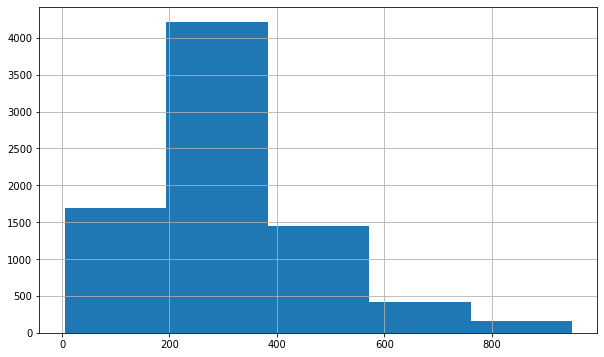

In [23]:
plt.figure(figsize=(10,6))
data['Fees'].hist(bins=5)

 Bangalore             1678
 Mumbai                1608
 Delhi                 1601
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
missing                  32
 Sector 5                 1
Name: City, dtype: int64


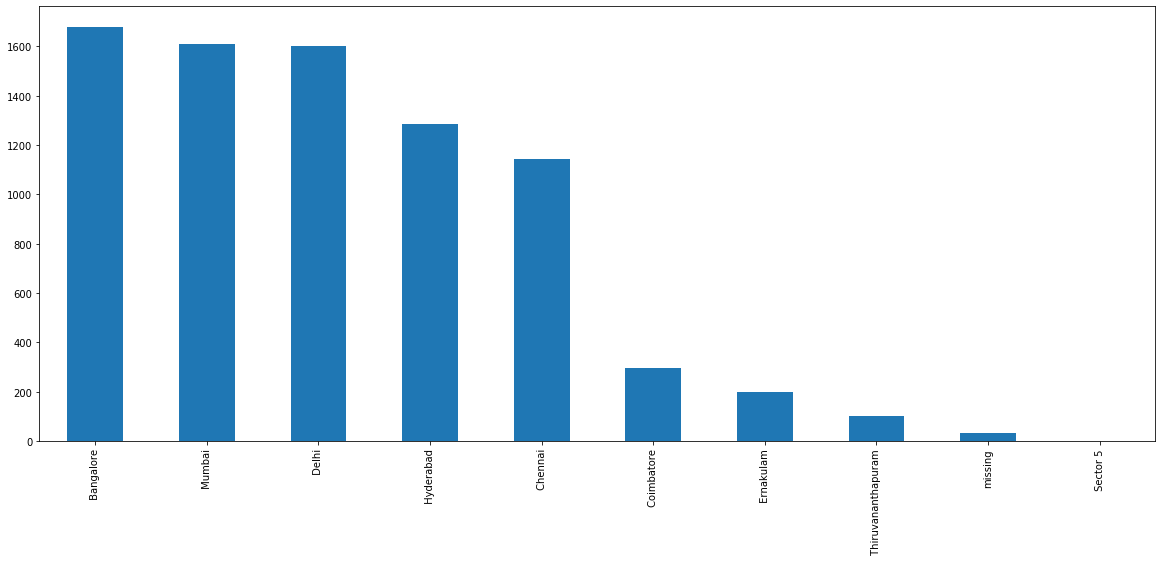

In [24]:
plt.figure(figsize=(20,8))
print(data['City'].value_counts())
data['City'].value_counts().plot.bar()

Most of the Doctors are from Banaglore,Mumbai and delhi are the top 3 cities

9     419
10    404
8     380
11    374
12    358
     ... 
58      1
60      1
64      1
61      1
66      1
Name: Expert, Length: 64, dtype: int64


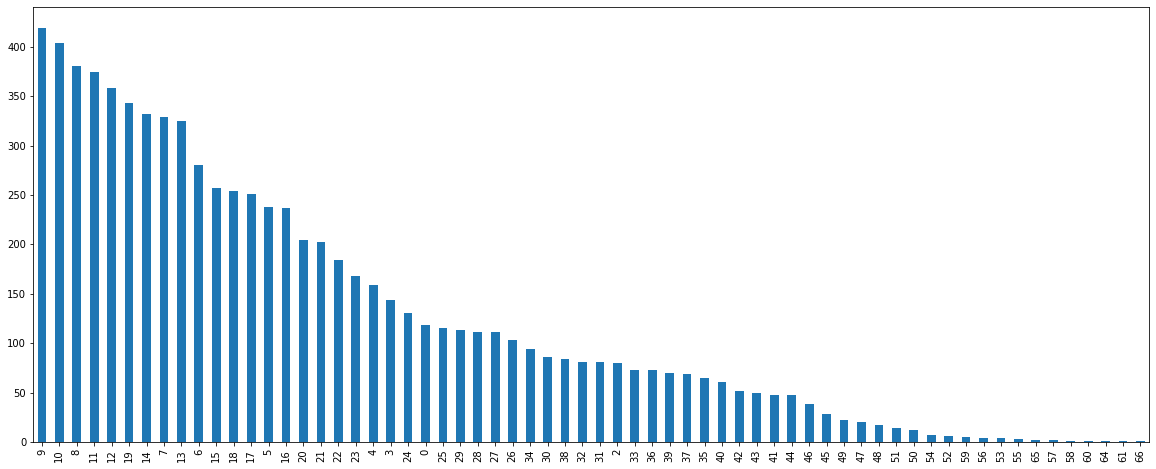

In [25]:
plt.figure(figsize=(20,8))
print(data['Expert'].value_counts())
data['Expert'].value_counts().plot.bar()

Most of the doctors are 9 years expiernced and as follows 

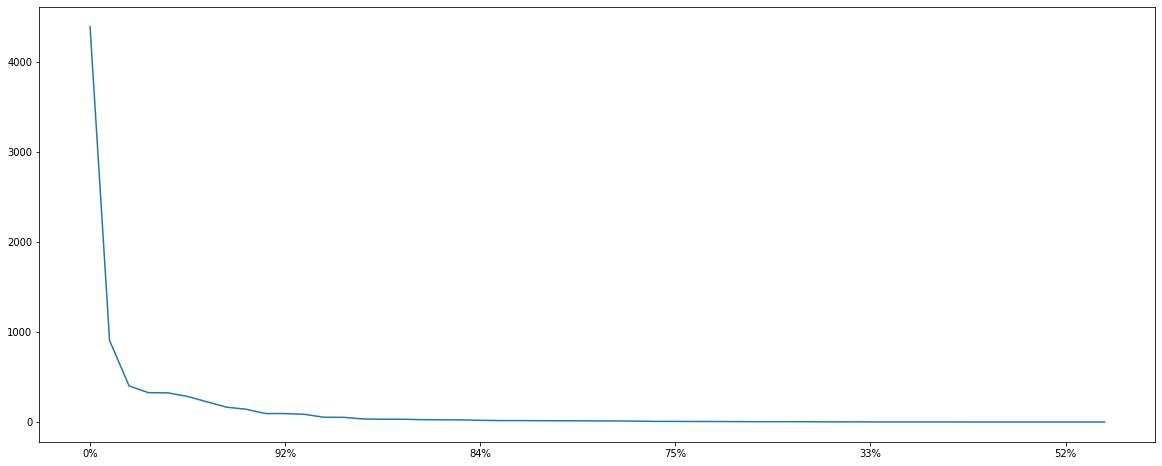

In [26]:
plt.figure(figsize=(20,8))
data['Rating'].value_counts().plot.line()

Dentist             1838
General Medicine    1617
Dermatologists      1373
Homeopath           1120
Ayurveda            1037
ENT Specialist       963
Name: Profile, dtype: int64


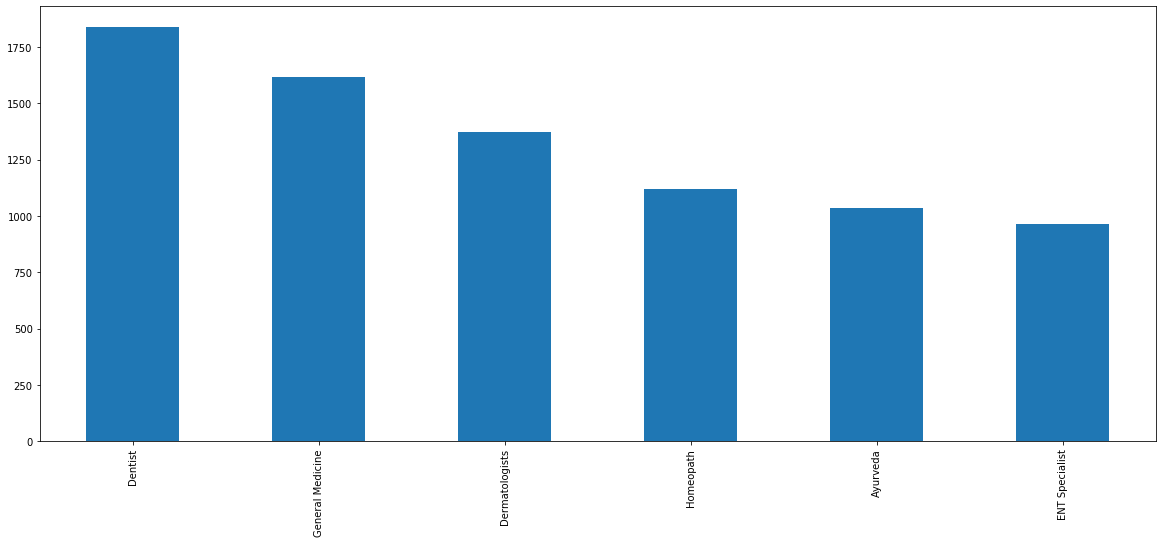

In [27]:
plt.figure(figsize=(20,8))
print(data['Profile'].value_counts())
data['Profile'].value_counts().plot.bar()

Here in the given dataset 

Dentist             1838,
General Medicine    1617,
Dermatologists      1373,
Homeopath           1120,
Ayurveda            1037,
ENT Specialist       963 

doctors and their profiles

In [28]:
data.dtypes

Rating                object
Profile               object
Miscellaneous_Info    object
Fees                   int32
Q1                    object
Q2                    object
Q3                    object
Expert                object
City                  object
Area                  object
dtype: object

In [29]:
data.columns

Index(['Rating', 'Profile', 'Miscellaneous_Info', 'Fees', 'Q1', 'Q2', 'Q3',
       'Expert', 'City', 'Area'],
      dtype='object')

In [30]:
data=data.drop(['Miscellaneous_Info'],axis=1)

In [31]:
col=['Rating', 'Q1', 'Q2', 'Q3',
       'Expert', 'Area']

In [32]:
#Label encoding 

le=LabelEncoder()
data[col]=data[col].apply(lambda x:le.fit_transform(x))
data

,Rating,Profile,Fees,Q1,Q2,Q3,Expert,City,Area
0,1,Homeopath,100,8,293,481,16,Ernakulam,324
1,51,Ayurveda,350,5,282,481,3,Bangalore,925
2,0,ENT Specialist,300,101,383,481,63,Bangalore,494
3,0,Ayurveda,250,14,10,481,3,Bangalore,74
4,1,Ayurveda,250,5,495,481,12,Chennai,367
...,...,...,...,...,...,...,...,...,...
1982,0,Ayurveda,307,5,180,481,1,Bangalore,76
1983,0,Dermatologists,307,111,491,309,33,Chennai,135
1984,0,General Medicine,307,101,323,481,63,Chennai,658
1985,51,Dentist,307,6,495,481,3,Bangalore,34


# Bivatiate Plot

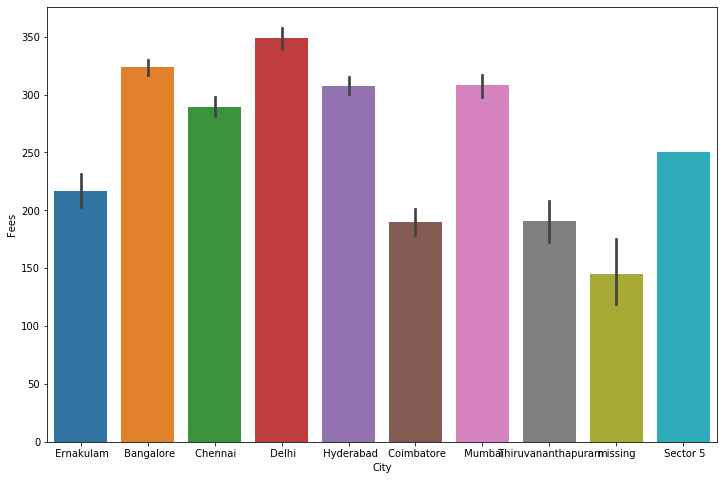

In [33]:
plt.figure(figsize=(12,8))
sb.barplot(x='City',y='Fees',data=data)

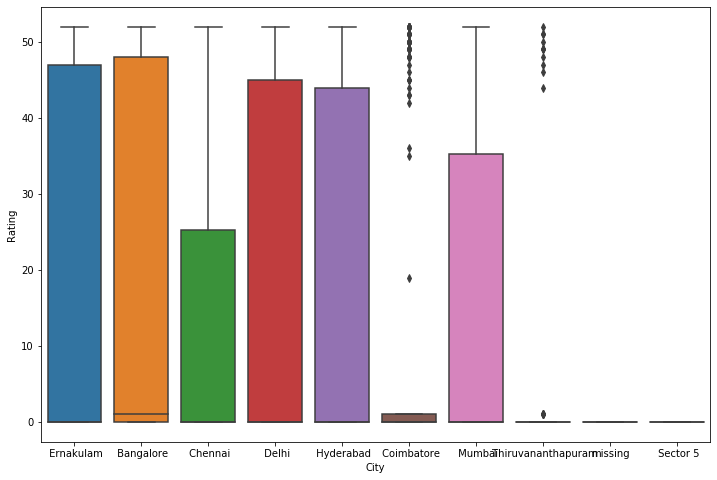

In [34]:
plt.figure(figsize=(12,8))
sb.boxplot(x='City',y='Rating',data=data)

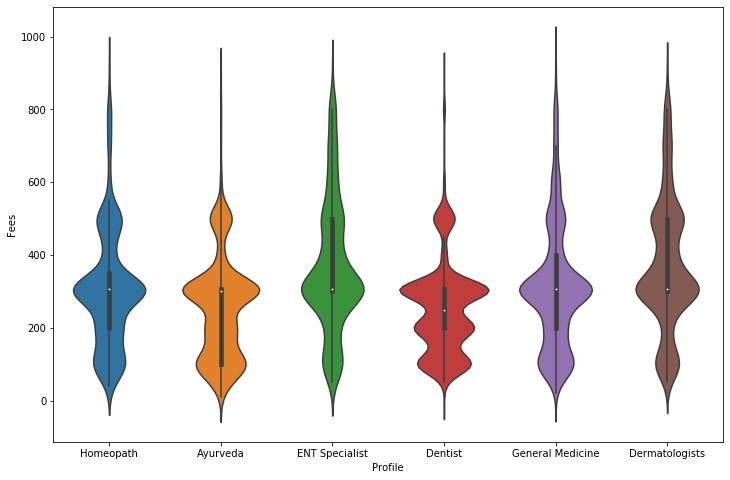

In [35]:
plt.figure(figsize=(12,8))
sb.violinplot(x='Profile',y='Fees',data=data)

In [36]:
data.dtypes

Rating      int32
Profile    object
Fees        int32
Q1          int32
Q2          int32
Q3          int32
Expert      int32
City       object
Area        int32
dtype: object

In [37]:
col=['Profile','City']

#preprocessing the data with labelencoder

le=LabelEncoder()
data[col]=data[col].apply(lambda x:le.fit_transform(x))
data

,Rating,Profile,Fees,Q1,Q2,Q3,Expert,City,Area
0,1,5,100,8,293,481,16,4,324
1,51,0,350,5,282,481,3,0,925
2,0,3,300,101,383,481,63,0,494
3,0,0,250,14,10,481,3,0,74
4,1,0,250,5,495,481,12,1,367
...,...,...,...,...,...,...,...,...,...
1982,0,0,307,5,180,481,1,0,76
1983,0,2,307,111,491,309,33,1,135
1984,0,4,307,101,323,481,63,1,658
1985,51,1,307,6,495,481,3,0,34


In [38]:
data.dtypes

Rating     int32
Profile    int32
Fees       int32
Q1         int32
Q2         int32
Q3         int32
Expert     int32
City       int32
Area       int32
dtype: object

In [39]:
#To get the descriptive analysis 

data.describe()

,Rating,Profile,Fees,Q1,Q2,Q3,Expert,City,Area
count,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,15.379089,2.458606,307.708480,60.420357,332.535732,428.503649,23.004278,3.086563,449.005033
std,21.986208,1.657217,165.338932,50.350335,152.671750,119.457938,20.890855,2.338544,278.786497
min,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,200.000000,6.000000,266.000000,481.000000,6.000000,1.000000,212.750000
50%,0.000000,2.000000,307.000000,101.000000,337.000000,481.000000,15.000000,3.000000,446.000000
75%,44.000000,4.000000,400.000000,101.000000,495.000000,481.000000,35.000000,5.000000,681.000000
max,52.000000,5.000000,950.000000,180.000000,495.000000,481.000000,63.000000,9.000000,937.000000


In [40]:
# the Correlation between the different variables

data.corr()

,Rating,Profile,Fees,Q1,Q2,Q3,Expert,City,Area
Rating,1.000000,-0.098999,0.124242,0.046418,-0.152716,-0.136921,-0.144075,-0.092860,-0.035027
Profile,-0.098999,1.000000,0.125784,0.309665,-0.009062,-0.045194,-0.022722,-0.006641,0.011361
Fees,0.124242,0.125784,1.000000,0.203881,-0.154297,-0.102969,-0.042118,-0.036433,-0.055103
Q1,0.046418,0.309665,0.203881,1.000000,-0.422380,-0.187059,0.005705,-0.030077,0.008559
Q2,-0.152716,-0.009062,-0.154297,-0.422380,1.000000,0.236772,0.043448,0.044677,0.015168
Q3,-0.136921,-0.045194,-0.102969,-0.187059,0.236772,1.000000,0.056323,0.029738,0.016130
Expert,-0.144075,-0.022722,-0.042118,0.005705,0.043448,0.056323,1.000000,0.026927,-0.009579
City,-0.092860,-0.006641,-0.036433,-0.030077,0.044677,0.029738,0.026927,1.000000,-0.070171
Area,-0.035027,0.011361,-0.055103,0.008559,0.015168,0.016130,-0.009579,-0.070171,1.000000


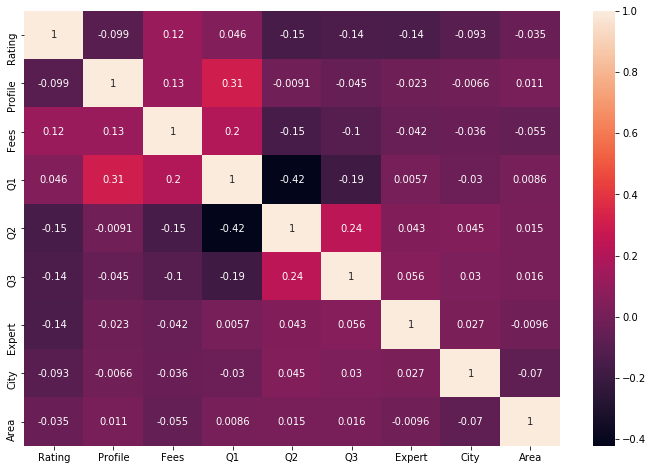

In [41]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(12,8))
sb.heatmap(data.corr(),annot=True)

pairwise plot of relationship with the dataset

Multivariate plotting of dataset

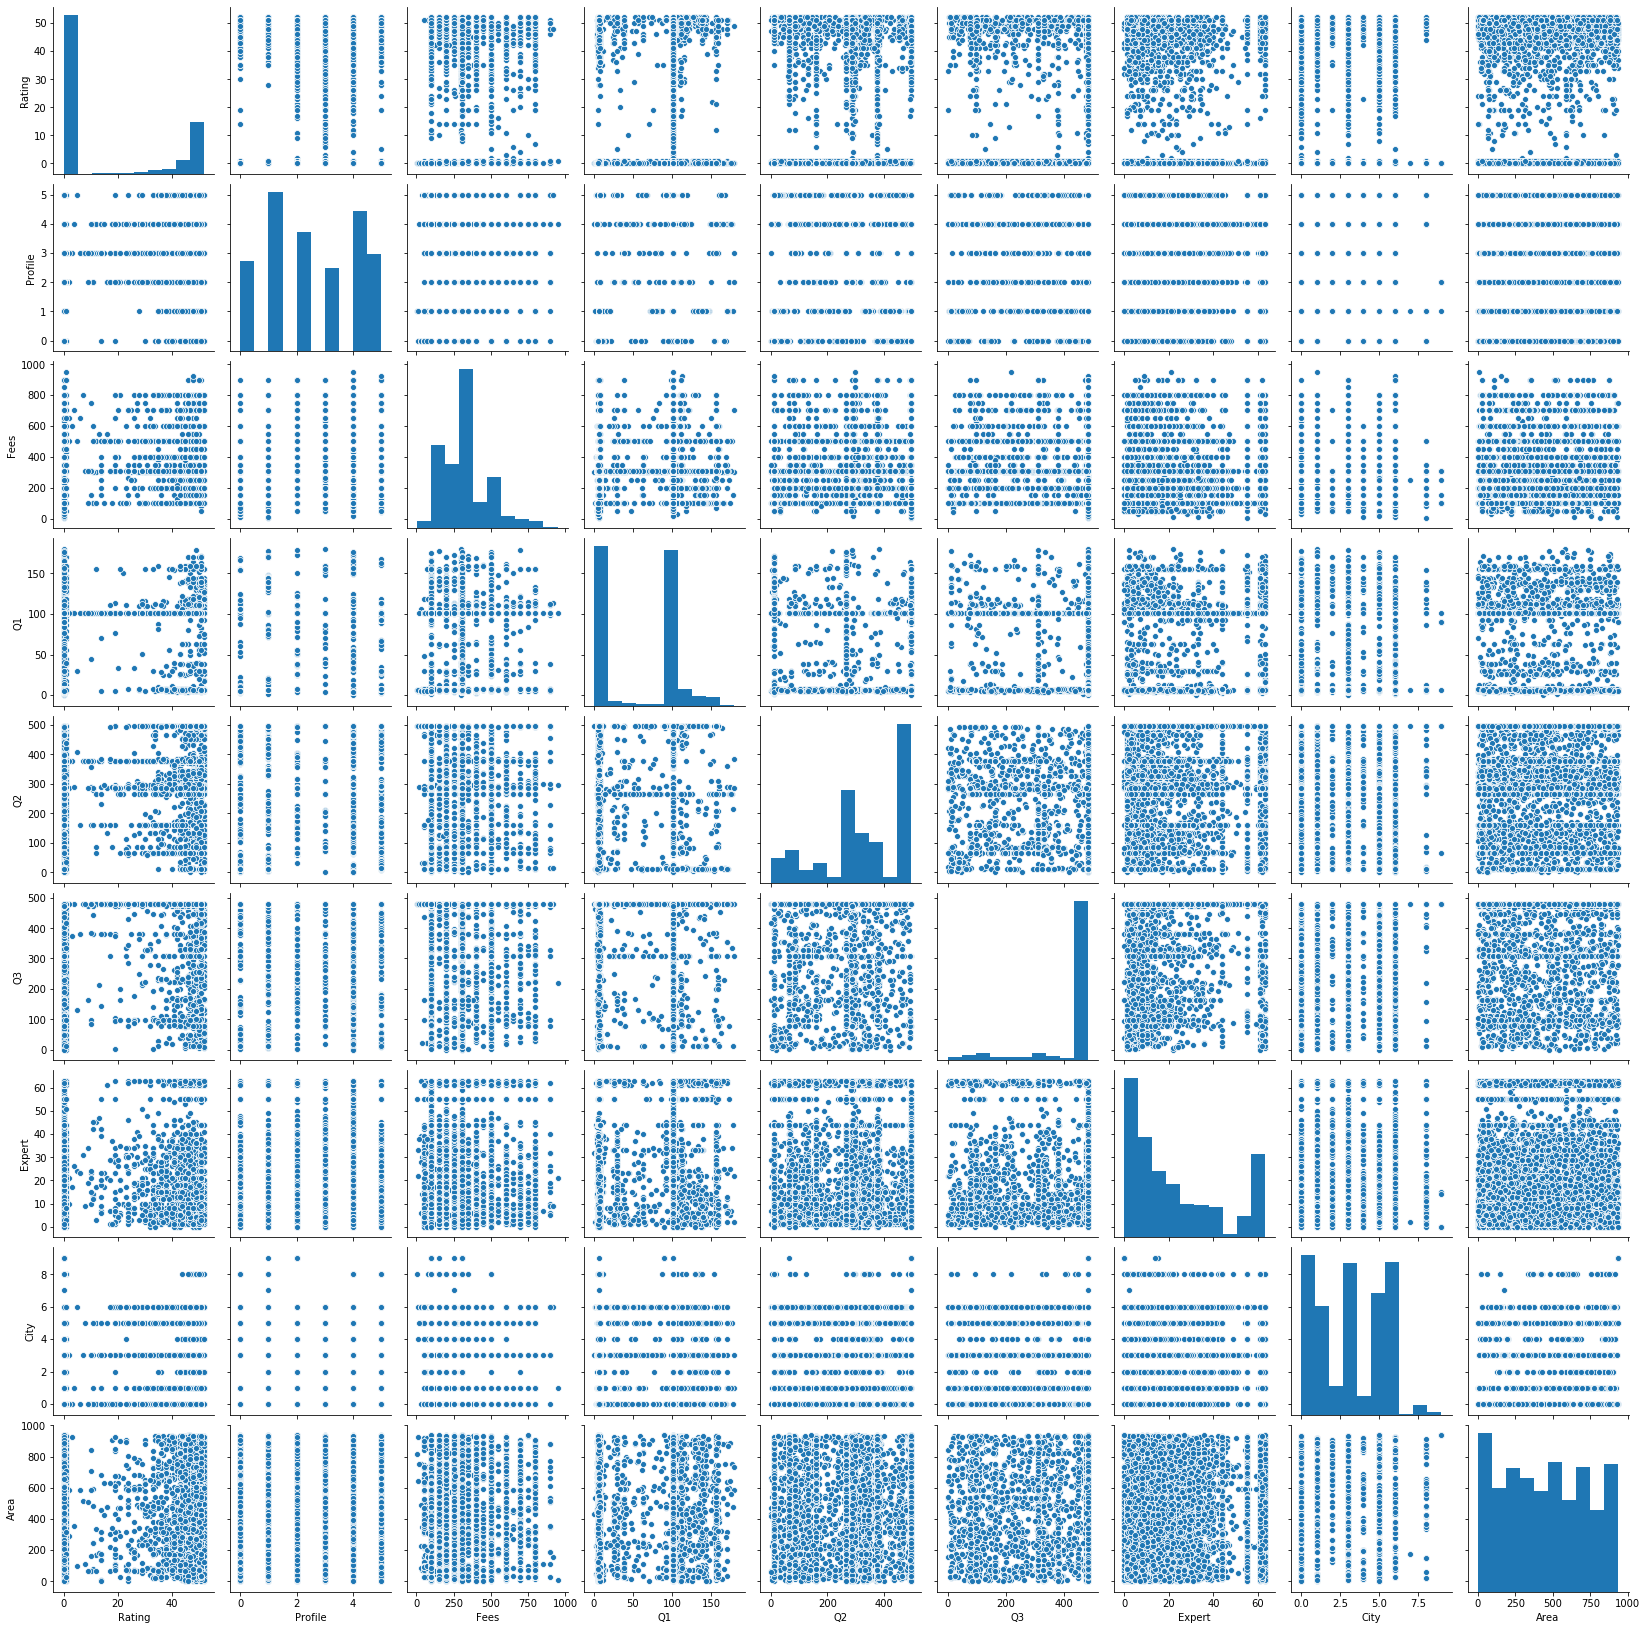

In [42]:
sb.pairplot(data)

# Model Building

Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

In [43]:
x=data.drop(['Fees'],axis=1)
y=data['Fees']

In [44]:
print(x.shape)
print(y.shape)

(7948, 8)
(7948,)


In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=100)

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [46]:
#working on RandomForestRegressor 
#training and testing data using RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)

In [47]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on RandomForestRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))


MAE : 118.57346797459549
MSE : 24651.910724651283
RMSE : 157.00926955008512

RMSLE: 0.5651201274106036


Cross Validation and Prediction

In [48]:
#cross valiadtion
score=cross_val_score(rfr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(rfr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.12303734574894658
STD score: 0.062320911838678

cross prediction [305.02  351.81  369.27  ... 267.49  202.445 458.   ]


In [49]:
#working on GradientBoostingRegressor 
#training and testing data using GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)

In [50]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on GradientBoostingRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))


MAE : 114.37954401385154
MSE : 23218.03419307249
RMSE : 152.3746507561953

RMSLE: 0.5539100184404192


Cross Validation and Prediction

In [51]:
#cross valiadtion
score=cross_val_score(gbr,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(gbr,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.1430757254471119
STD score: 0.07246434827072652

cross prediction [328.35303477 324.97031719 372.12202374 ... 293.72299106 216.8032876
 324.73003898]


In [52]:
#working on SVC 
#training and testing data using SVC

svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)

In [53]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on SVC

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))


MAE : 115.6245596376447
MSE : 27464.816305988927
RMSE : 165.72512273638213

RMSLE: 0.602448098231627


Cross Validation and Prediction

In [54]:
#cross valiadtion
score=cross_val_score(svc,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(svc,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.24999996041970934
STD score: 0.00026312429442490535

cross prediction [307 307 307 ... 307 307 307]


In [55]:
#working on AdaBoostRegressor 
#training and testing data using AdaBoostRegressor

adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
pred=adb.predict(x_test)

In [56]:
#Finding mean_absolute_error,mean_squared_error, root_mean_square on AdaBoostRegressor

print('MAE :',metrics.mean_absolute_error(y_test,pred))
print('MSE :',metrics.mean_squared_error(y_test,pred))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
print()
print('RMSLE:',np.sqrt(metrics.mean_squared_log_error(y_test, pred)))


MAE : 124.03166584838277
MSE : 25380.041220056242
RMSE : 159.3111459379294

RMSLE: 0.6003406480352838


Cross Validation and Prediction

In [57]:
#cross valiadtion
score=cross_val_score(adb,x,y,cv=5)
print('mean score :',score.mean())
print('STD score:',score.std())
print()
#cross prediction
predscore=cross_val_predict(adb,x,y,cv=5)
print("cross prediction",predscore)

mean score : 0.08717053228659591
STD score: 0.04718538442619597

cross prediction [399.29461636 321.18341969 392.82170949 ... 386.87326733 253.14044944
 395.92260918]


# Grid Search

GridSearchCV for the best model

In [ ]:
param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best params :',gridscv.best_params_)

# Saving the model with joblib

In [ ]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'doc.pkl')

# Conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib